In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from data import load_database_train, load_database_test
from sklearn.neighbors import KNeighborsClassifier
from preprocessing import InterpolateRawData
from test_model import test_model
from train import grid_search, scikit_train_validate
from cross_validation import cv_folds_author
import numpy as np
from plotter import plot_all_readings
from preprocessing import InterpolateRawData
from sklearn.neural_network import MLPClassifier
import pickle

%matplotlib inline

In [2]:
database_train = load_database_train()
X_processed = InterpolateRawData(num_samples=40).fit_transform(database_train.X)

database_test = load_database_test()
X_processed_test = InterpolateRawData(num_samples=40).fit_transform(database_test.X)

## Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library

train_scores:     ['0.94', '0.94', '0.95', '0.99', '0.95'] 
mean_train_score: 0.95
std_train_score:  0.02


test_scores:      ['0.81', '0.86', '0.93', '0.42', '0.77']
mean_test_score:  0.76
std_test_score:   0.17


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


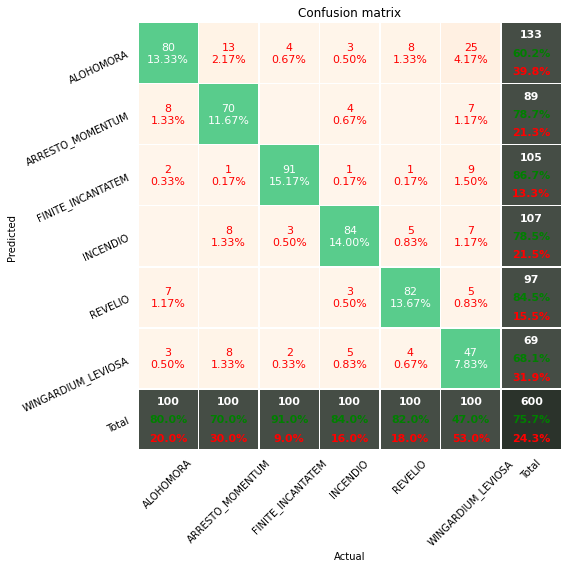

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


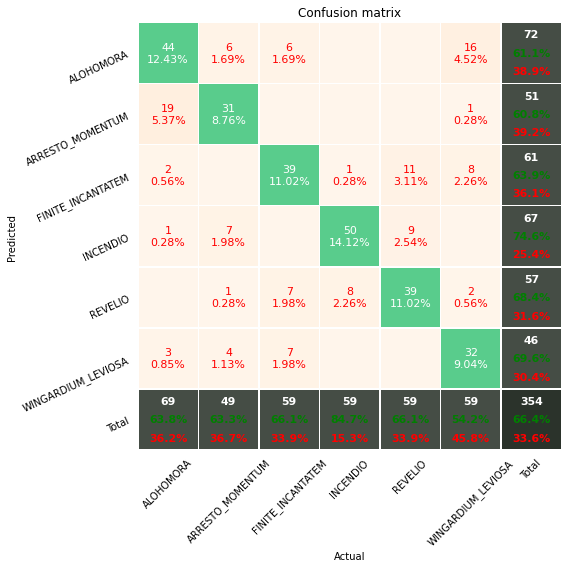

In [3]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('logisticRegression', LogisticRegression(random_state=0, C=1, class_weight='balanced',
                          max_iter=10, fit_intercept=False, n_jobs=5, solver='sag'))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_logistic_regression.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

## KNN

train_scores:     ['0.92', '0.91', '0.90', '0.97', '0.91'] 
mean_train_score: 0.92
std_train_score:  0.02


test_scores:      ['0.79', '0.50', '0.91', '0.56', '0.87']
mean_test_score:  0.72
std_test_score:   0.17


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


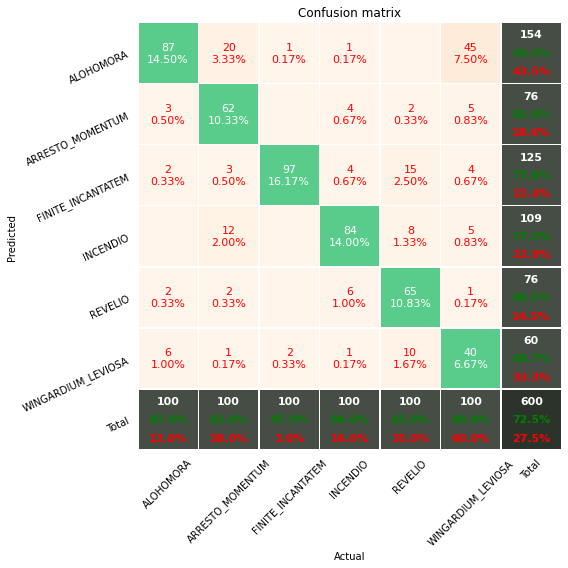

/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


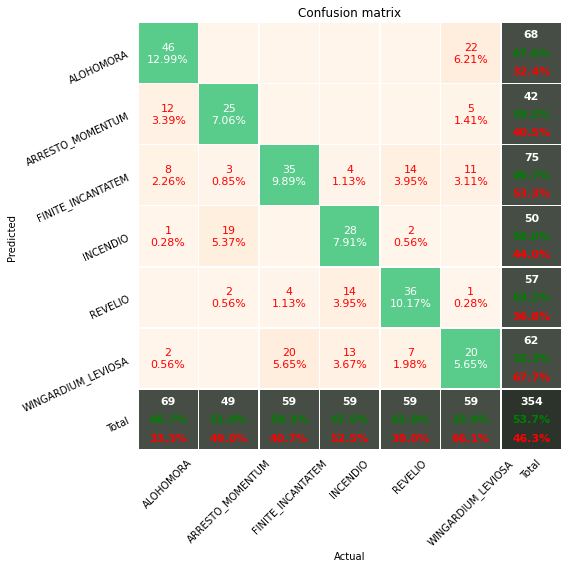

In [4]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=3))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_knn.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

## Neural Network

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.90', '0.91', '0.96', '0.46', '0.93']
mean_test_score:  0.83
std_test_score:   0.19


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


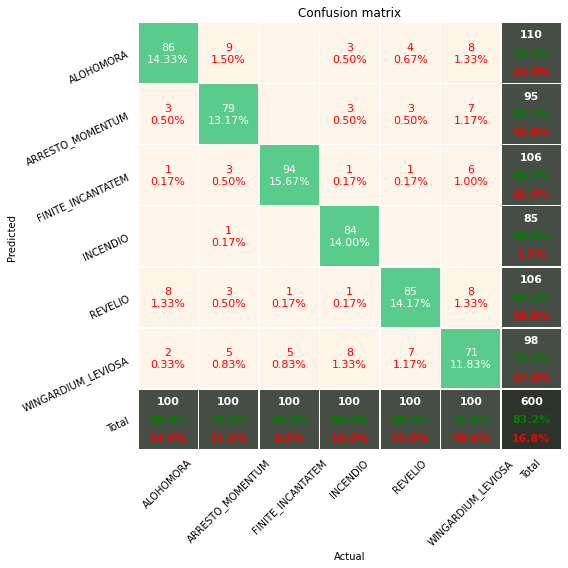

/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


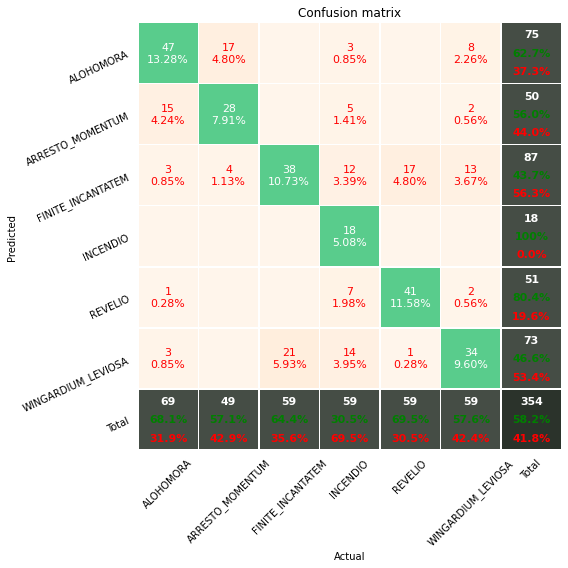

In [6]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('mlp', MLPClassifier(random_state=0, hidden_layer_sizes=(100, 10),
                          max_iter=100000, alpha=0.0001, learning_rate_init=0.0005))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_fully_connected.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

#### Extra: modelo só com acelerometro

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.83', '0.87', '0.90', '0.53', '0.72']
mean_test_score:  0.77
std_test_score:   0.14


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


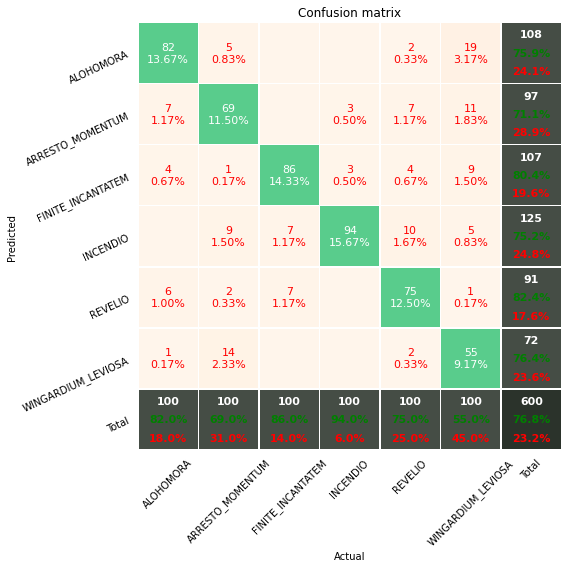

In [5]:
pipe = Pipeline([
    ('interpolate',InterpolateRawData(features_name=["ACC"], num_samples=40)),
    ('mlp', MLPClassifier(random_state=0, hidden_layer_sizes=(50, 10),
                          max_iter=100000, alpha=0.0001, learning_rate_init=0.0005))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_fully_connected_acc.pkl', 'wb') as file:
    pickle.dump(pipe, file)

## Random forest

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.92', '0.57', '0.96', '0.44', '0.92']
mean_test_score:  0.76
std_test_score:   0.21


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


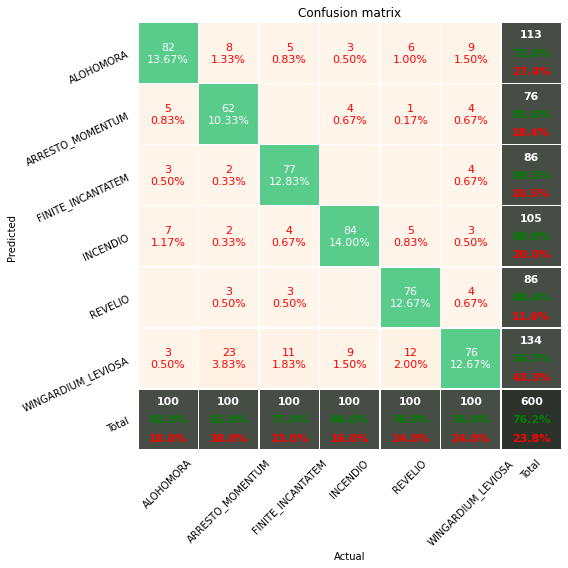

/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


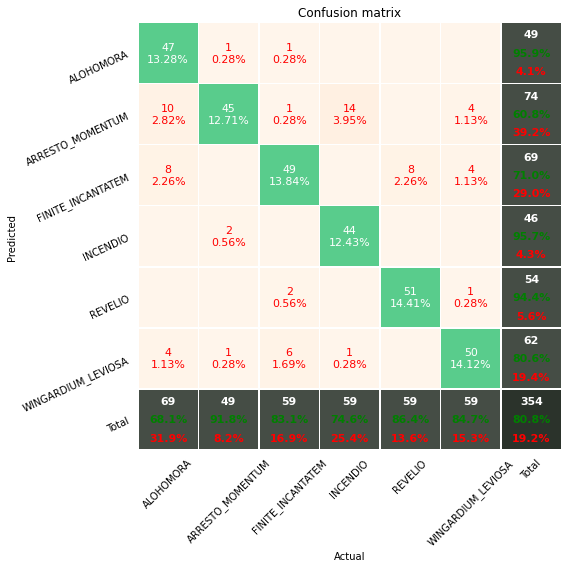

In [7]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=40)),
    ('random', RandomForestClassifier(random_state=0, max_depth=10, max_features=0.6))
])

scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_random_forest.pkl', 'wb') as file:
    pickle.dump(pipe, file)
    
test_model(pipe, False)

#### Extra: modelo só com acelerometro

train_scores:     ['1.00', '1.00', '1.00', '1.00', '1.00'] 
mean_train_score: 1.00
std_train_score:  0.00


test_scores:      ['0.81', '0.47', '0.74', '0.40', '0.79']
mean_test_score:  0.64
std_test_score:   0.17


/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:151: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:152: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:154: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/Users/Heitor/src/unicamp/mc906/prj3/confusion_matrix.py:155: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False


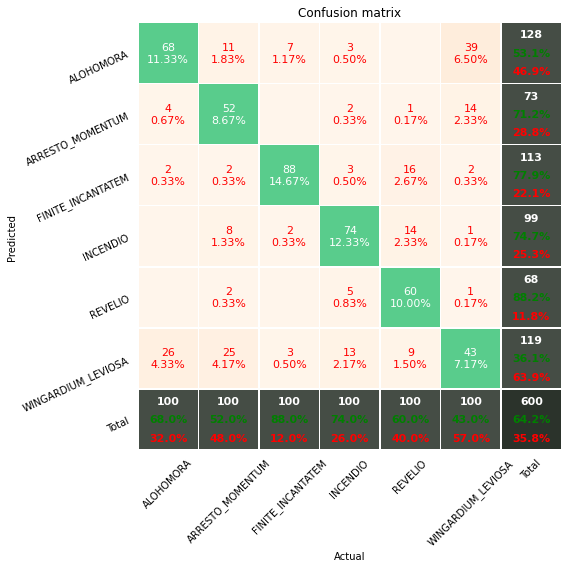

In [9]:
pipe = Pipeline([
    ('interpolate', InterpolateRawData(features_name=["ACC"], num_samples=40)),
    ('random', RandomForestClassifier(random_state=0, max_depth=10, max_features=0.6))
])


scikit_train_validate(pipe, database_train.X, database_train.y, database_train.cv_author)

pipe.fit(database_train.X, database_train.y)
 
with open('models/best_random_forest_acc.pkl', 'wb') as file:
    pickle.dump(pipe, file)